<a href="https://colab.research.google.com/github/Shenghao27/Prediction-of-quality-of-Wine/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_06_%E7%B4%85%E9%85%92%E5%93%81%E8%B3%AA%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 環境準備 : 載入套件

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 載入&觀察資料

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## 欄位定義(參考kaggle &UCI)

*   'fixed acidity':固定酸度 / 與葡萄酒有關的大多數酸性物質是固定的或非揮發性的（不容易蒸發）
*   'volatile acidity':揮發性酸度 / 葡萄酒中的醋酸含量，含量過高會產生的醋味
*   'citric acid':檸檬酸 / 少量的檸檬酸可增加葡萄酒的「新鮮感」和風味
*   'residual sugar':殘餘糖份 / 發酵結束後剩餘的糖分，少於 1 克/升的葡萄酒很少見，大於 45 克/升的葡萄酒被視為甜酒。
*   'chlorides':氯化物 / 葡萄酒中的鹽分含量
*   'free sulfur dioxide':遊離二氧化硫 / 游離形式的 SO2 存在於分子 SO2（作為溶解氣體）和亞硫酸氫鹽離子之間的平衡狀態；它可以防止微生物生長和葡萄酒的氧化。
*   'total sulfur dioxide':總二氧化硫 / 游離和結合形式的二氧化硫的數量；在低濃度時，葡萄酒中大多無法檢測到二氧化硫，但當游離二氧化硫濃度超過 50 ppm 時，二氧化硫會在葡萄酒的嗅覺和口感中變得明顯。
*   'density':密度 / 水的密度幾乎取決於酒精百分比和糖分含量
*   'pH':酸鹼值 / 描述葡萄酒的酸性或鹼性，酸度範圍從 0（非常酸）到 14（非常鹼）；大多數葡萄酒的 pH 值介於 3-4 之間。
*   'sulphates':硫酸鹽 / 一種葡萄酒添加劑，可增加二氧化硫氣體 (S02) 的含量，具有抗菌和抗氧化的作用。
*   'alcohol':酒精度 / 葡萄酒的酒精含量
*   'quality':品質 / 基於感官資料,0 到 10 分之間

In [4]:
df.info()
# 並無遺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: xlabel='quality', ylabel='count'>

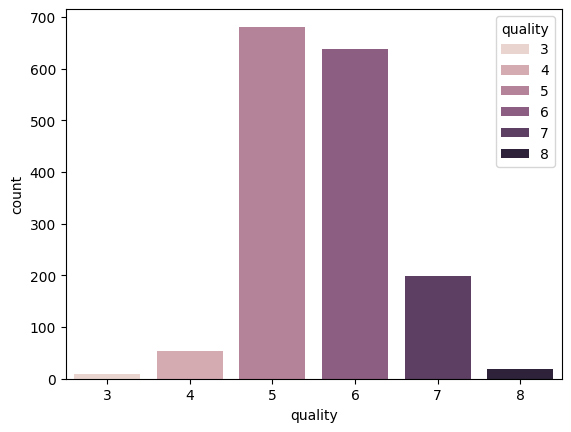

In [6]:
# 觀察Target('quality')的類別分布程度
sns.countplot(x='quality', hue='quality', data=df)

# 從圖表可明顯看出 quality 有類別不平衡（class imbalance）的情況
# 會導致預測結果偏向'5'或'6'，建模時需再留意

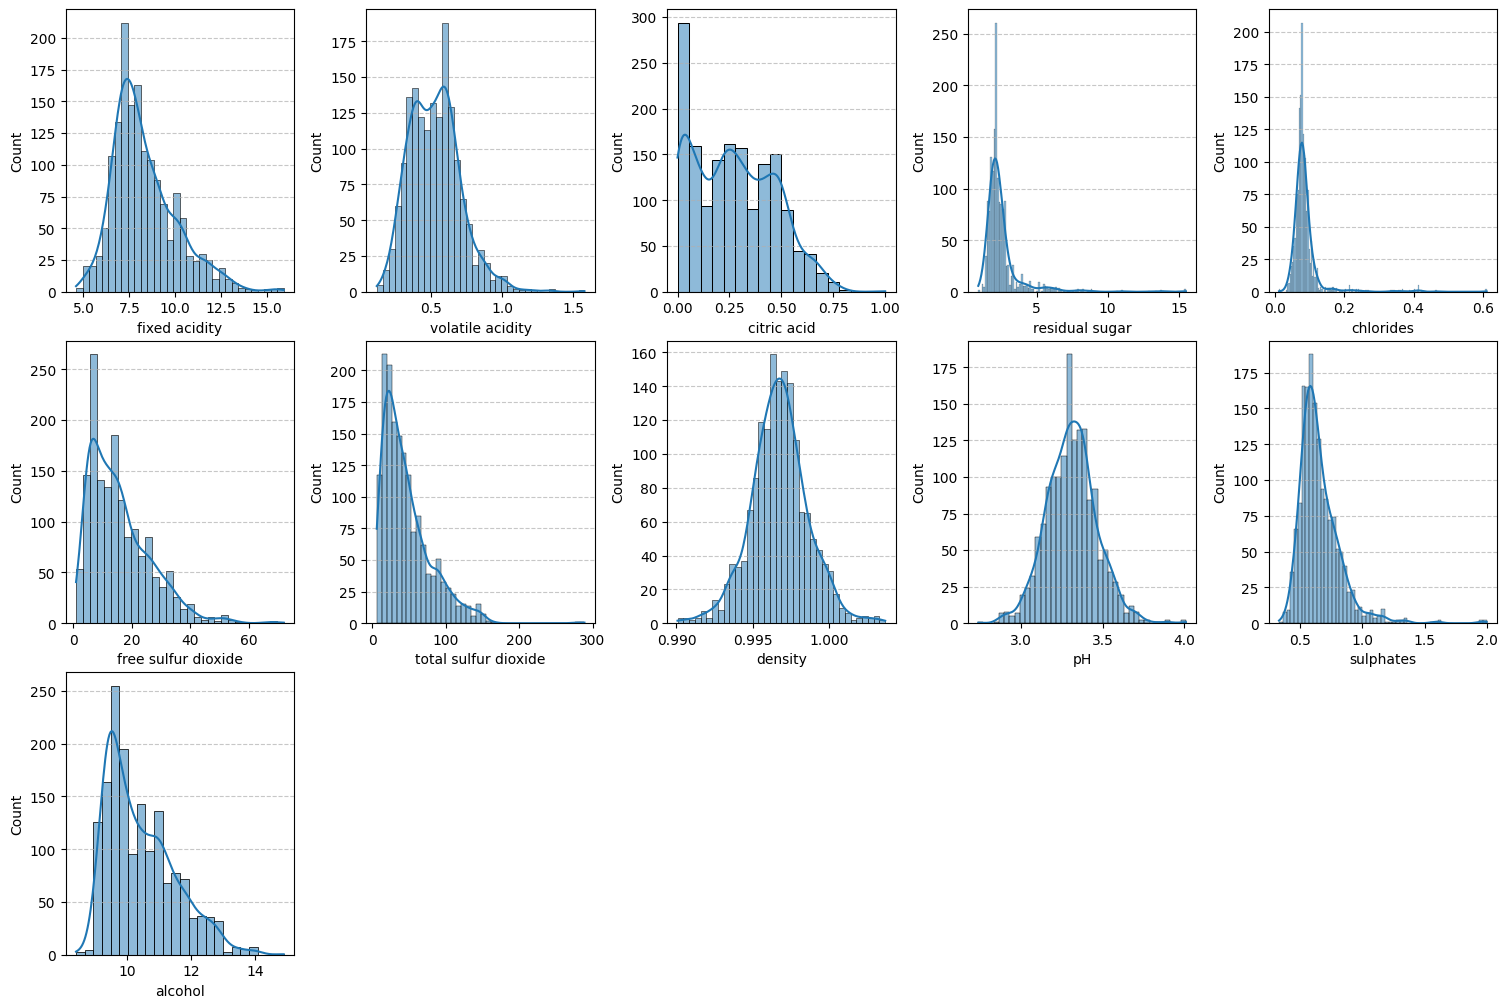

In [7]:
# 每個特徵的資料分布---直方圖（Histogram）
# 先把不需要的 target 欄位排除
feature_cols = df.columns.drop('quality')

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(feature_cols):
    sns.histplot(
        df[col],
        kde=True,
        ax=axes[i]
        # color='skyblue'
    )
    # axes[i].set_title(f'Distribution of {col}')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# 若特徵數少於子圖數，關閉多餘的子圖
for j in range(len(feature_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=0.4)
plt.show()


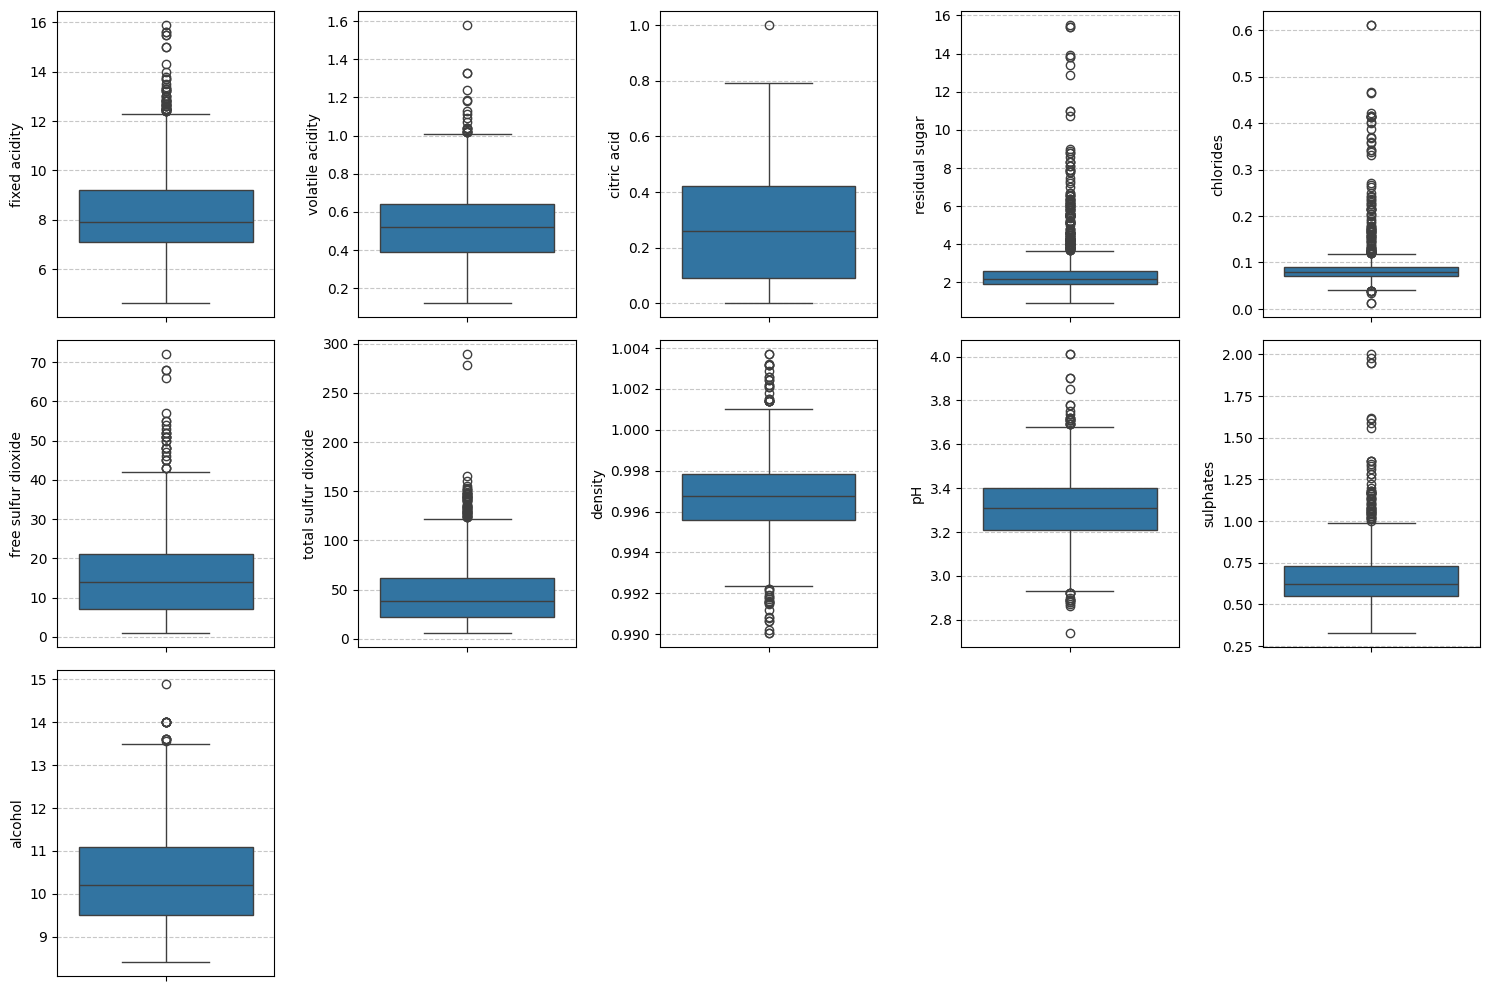

In [8]:
# 每個特徵的資料分布---箱型圖（Boxplot）
# 先把不需要的 target 欄位排除
feature_cols = df.columns.drop('quality')

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(feature_cols):
    sns.boxplot(
        y=df[col],
        ax=axes[i]
        )
    # axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# 如果子圖數 > 特徵數，關閉多餘子圖
for j in range(len(feature_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

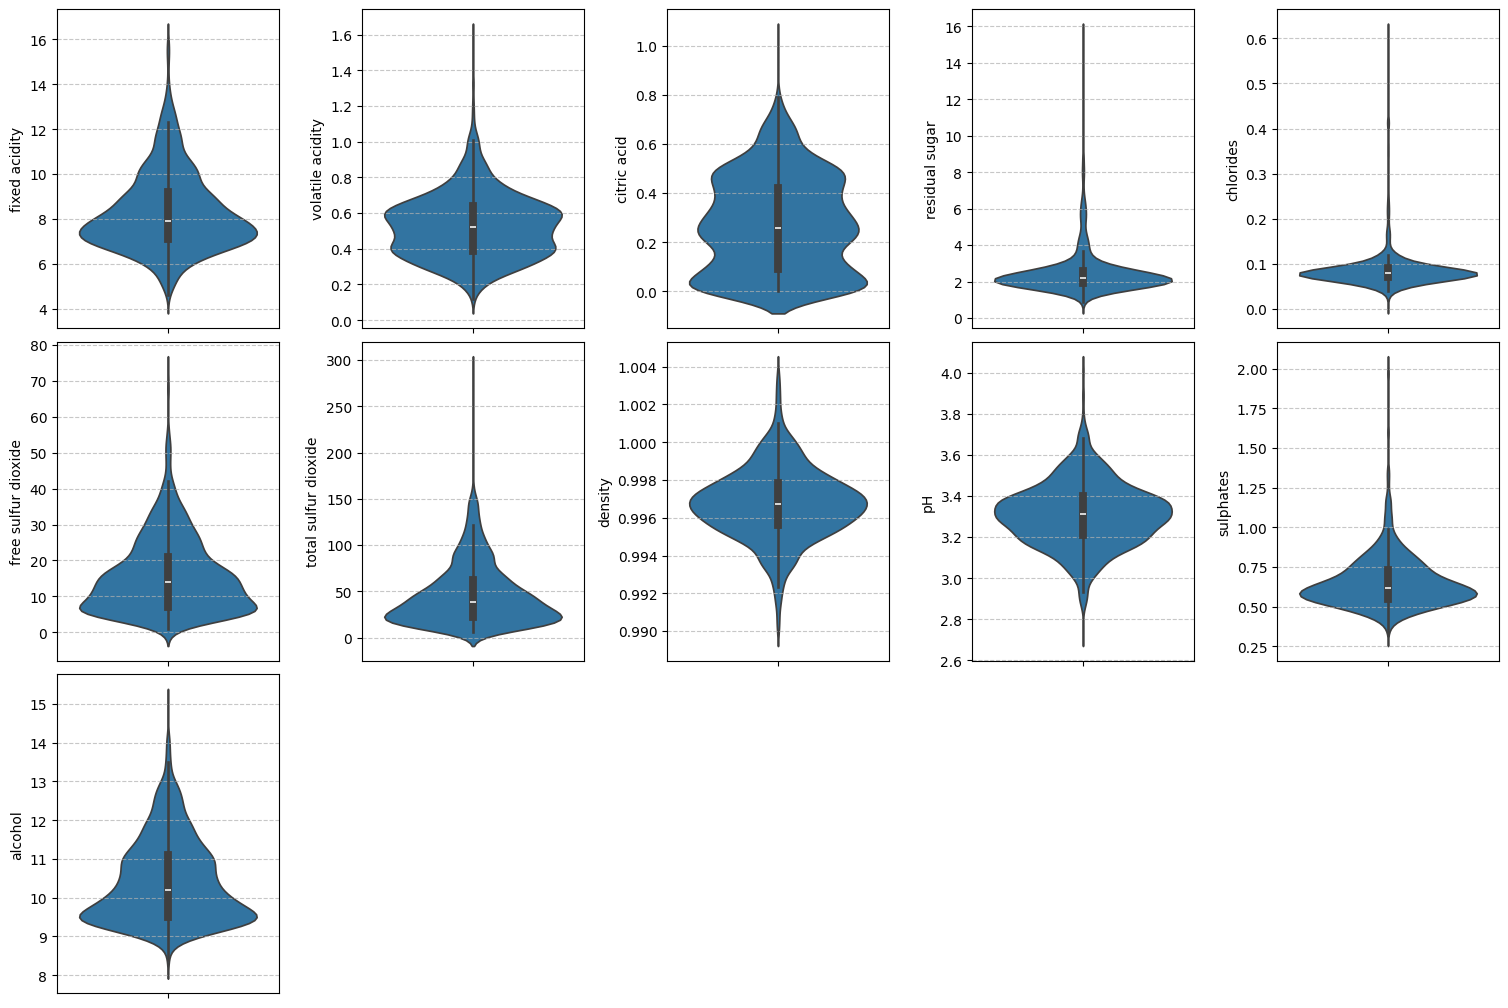

In [9]:
# 每個特徵的資料分布---小提琴圖（Violin plot）
# 先把不需要的 target 欄位排除
feature_cols = df.columns.drop('quality')

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(feature_cols):
    sns.violinplot(
        y=df[col],
        ax=axes[i]
        )
    # axes[i].set_title(f'Distribution of {col}')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# 若特徵數少於子圖數，關閉多餘的子圖
for j in range(len(feature_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=0.4)
plt.show()


✅ 各特徵分布觀察

1️⃣ **fixed acidity、volatile acidity、citric acid**

* 都是**明顯右偏分布**：大多數數值集中在左邊，少數值落在右側高值區。
* 表示大部分紅酒酸度偏低，少數有較高酸度。

2️⃣ **residual sugar**

* **極端的右偏分布**。
* 大部分樣本糖分很低，少部分樣本糖分非常高 → 異常高糖分樣本會影響模型，需要留意。

3️⃣ **chlorides**

* **極端的右偏分布**。
* 大部分在低值，極少數樣本氯含量非常高 → 潛在異常。

4️⃣ **free sulfur dioxide、total sulfur dioxide**

* **明顯右偏分布**。
* 大多數酒硫含量低，但少數樣本硫含量高很多 → 長尾分布明顯。

5️⃣ **density**

* 接近常態分布。
* 分布相對對稱，稍有輕微右偏。

6️⃣ **pH**

* 接近常態分布。
* 分布偏中性，稍微右偏；多數紅酒 pH 值集中在 3.0–3.4。

7️⃣ **sulphates**

* **明顯右偏分布**。
* 大部分硫酸鹽含量集中在低值。

8️⃣ **alcohol**

* 右偏分布。
* 多數酒精度在 9–11% 左右，少數酒精度高到 13–14%。


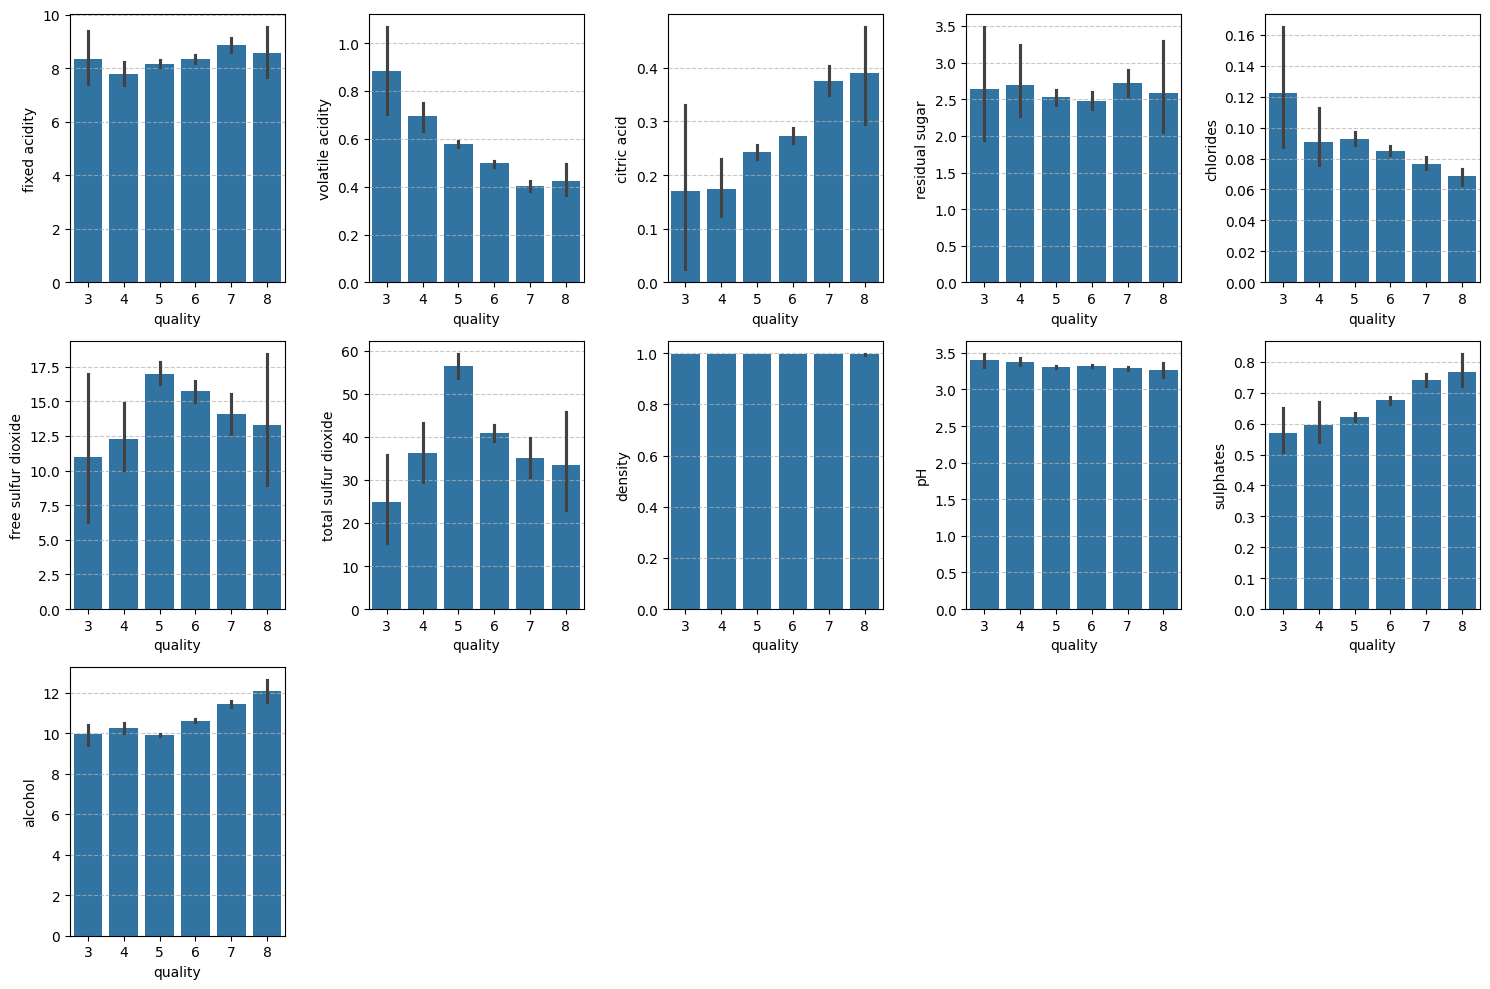

In [10]:
# 觀察每一個欄位與 quality 資料分佈的情況
# 先把不需要的 target 欄位排除
feature_cols = df.columns.drop('quality')

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(feature_cols):
    sns.barplot(
        data=df,
        x='quality',
        y=col,
        ax=axes[i]
        )
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# 若特徵數少於子圖數，關閉多餘的子圖
for j in range(len(feature_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 觀察後的結果:
# fixed acidity / residual sugar, :趨勢不明顯
# volatile acidity / chlorides :呈現明顯下降趨勢。
# citric acid / sulphates / alcohol:呈現上升趨勢。
# free sulfur dioxide / total sulfur dioxide:沒有穩定趨勢，且誤差大。
# density / pH :幾乎平直，可能與品質沒有顯著線性關聯。


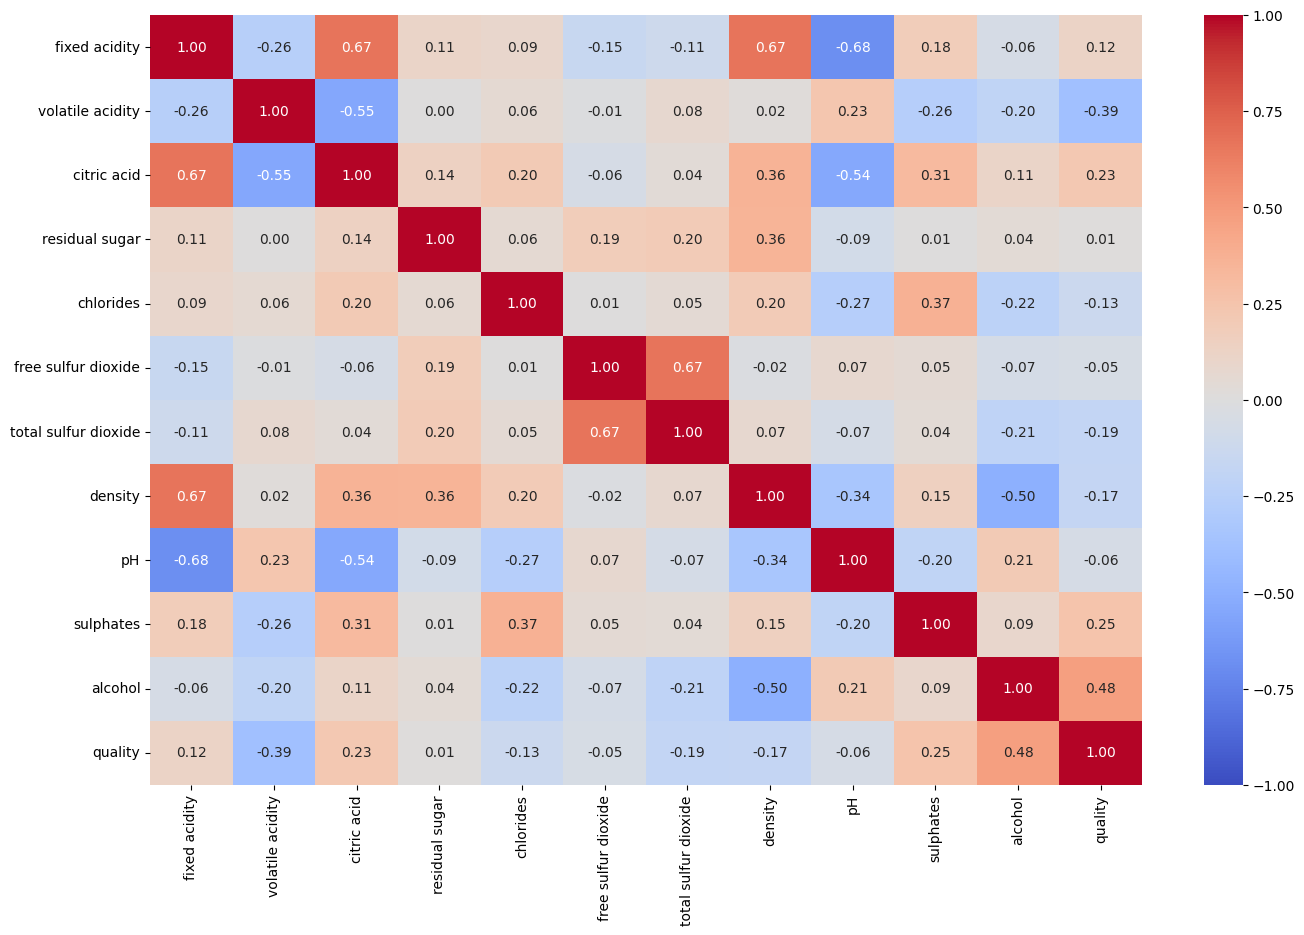

In [11]:
# 比較每個特徵間的關聯程度
corr_matrix = df.corr(method='pearson')
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.show()